In [22]:
import numpy as np
from sklearn import datasets
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
import matplotlib

# Use float32 as the default float data type
theano.config.floatX = 'float32'
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5.0, 4.0)

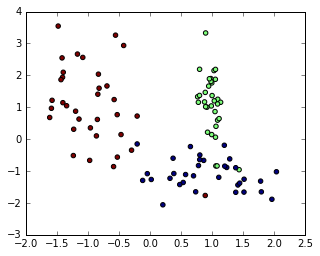

In [23]:
n_samples = 100
n_features = 2
n_classes = 3
train_X, train_y = datasets.make_classification(n_samples=n_samples,
                                                n_features=n_features,
                                                n_redundant=0,
                                                n_informative=2,                             
                                                n_clusters_per_class=1, 
                                                n_classes=n_classes)
train_y_onehot = np.eye(n_classes)[train_y]
plt.scatter(train_X[:, 0], train_X[:, 1], marker='o', c=train_y)

In [24]:
# Define model
X = theano.shared(train_X.astype('float32'))
y = theano.shared(train_y_onehot.astype('float32'))

W = theano.shared(np.random.randn(n_features, n_classes).astype('float32'), name='W')
b = theano.shared(np.zeros(n_classes).astype('float32'), name='b')

z = X.dot(W) + b
y_hat = T.nnet.softmax(z)
prediction = T.argmax(y_hat, axis=1)

reg_lambda = np.float32(0.01)
loss1 = T.nnet.categorical_crossentropy(y_hat, y).mean() # use cross-entropy loss for softmax classification
loss2 = reg_lambda/2.0 * T.sum(T.sqr(W)).mean() # add L2-regularization
loss = loss1 + loss2

# Gradient descent
dW = T.grad(loss, W)
db = T.grad(loss, b)

epsilon = np.float32(0.01)
gradient_step = theano.function([],
                                updates=((W, W - epsilon * dW),
                                         (b, b - epsilon * db)))

f_loss = theano.function([], loss)

In [25]:
# build model
n_epochs = 1000
for i in xrange(n_epochs):
    gradient_step()
    if i % 100 == 0:
        print i, 'loss=',f_loss()

0 loss= 3.40663394812
100 loss= 1.74536043335
200 loss= 0.943195018204
300 loss= 0.58304907267
400 loss= 0.445588341367
500 loss= 0.392029772366
600 loss= 0.366436983863
700 loss= 0.351682426211
800 loss= 0.341974302966
900 loss= 0.334999944373


In [26]:
f_prediction = theano.function([], prediction, allow_input_downcast=True)

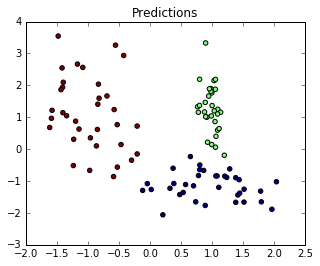

In [29]:
y_pred = f_prediction()
plt.title("Predictions")
plt.scatter(train_X[:, 0], train_X[:, 1], marker='o', c=y_pred)

In [33]:
error = np.sum(np.abs(np.sign(train_y-y_pred))) * 1.0 / len(train_y)

In [34]:
print 'Mean error: ', error

Mean error:  0.06


In [35]:
print np.mean(np.abs(np.sign(train_y-y_pred)))

0.06
